<a href="https://colab.research.google.com/github/antoinexp/random_notebooks/blob/main/covid_simulator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [428]:
# antoinexp@gmail.com

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

In [408]:
N = 70000000 # Total population

hospital_limit_percentage = 0.0008

N_DAYS = 365
dt = 0.1
N_STEPS = int(N_DAYS/dt)

TIME_STEPS = np.arange(0, N_STEPS)
TIME_SPACE = dt*TIME_STEPS
TIME_LABEL = np.datetime64('2020-01-01') + TIME_SPACE*np.timedelta64(1, 'D')

hospital_ratio = 0.10
death_ratio = 0.018
death_ratio_overloaded = 0.03 # death ratio when hospital_ratio exceeded

beta = 1/(5.)
gamma = 1/(13.)
alpha = lambda r: r + 20.

# Change this parameter to simulate lockdown
R0 = 3.*np.ones(N_STEPS)
# example:
for t in range(int(76/dt), TIME_STEPS[-1]):
   R0[t] = max(3.-(t-int(76/dt))*dt*0.2, 0.2)

for t in range(int(170/dt), TIME_STEPS[-1]):
   R0[t] = min(0.2+(t-int(170/dt))*dt*0.2, 1.8)

for t in range(int(280/dt), TIME_STEPS[-1]):
   R0[t] = max(1.8-(t-int(280/dt))*dt*0.2, 0.3)

In [409]:
S = np.ones(N_STEPS)*(N-1) # Susceptible
I = np.ones(N_STEPS) # Infected
R = np.zeros(N_STEPS) # Recovered
D = np.zeros(N_STEPS) # Dead 
GDP = np.zeros(N_STEPS)

R0=3.0 herd_immunity_ratio=66.67%


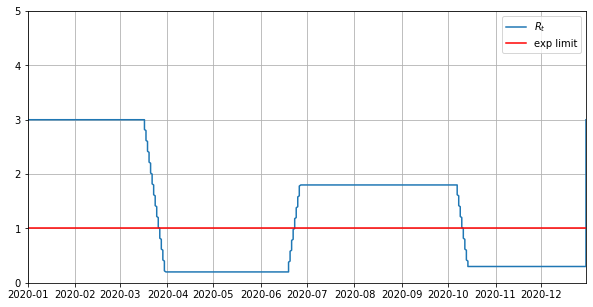

In [410]:
plt.figure(figsize=(10, 5))
print(f"R0={R0[0]} herd_immunity_ratio={100*(1 - 1/R0[0]):.2f}%")
plt.plot(TIME_LABEL, R0, label="$R_t$")
plt.axhline(1., color='r', label="exp limit")
plt.grid(True)
plt.xlim(TIME_LABEL[0], TIME_LABEL[-1])
plt.legend()
plt.ylim(0., 5.)
plt.show()

In [411]:
for t in TIME_STEPS[1:]:
  beta = R0[t]*gamma
  tmp1 = (beta/N)*I[t-1]*S[t-1]
  tmp2 = gamma*I[t-1]
  S[t] = S[t-1] - dt*tmp1
  I[t] = I[t-1] + dt*(tmp1 - tmp2)
  dr = death_ratio 
  if hospital_ratio*I[t-1] > hospital_limit_percentage*N:
    dr = death_ratio_overloaded
  R[t] = R[t-1] + (1-dr)*dt*tmp2
  D[t] = D[t-1] + dr*dt*tmp2

  GDP[t] = GDP[t-1] + dt*alpha(R0[t])*(S[t] + R[t])

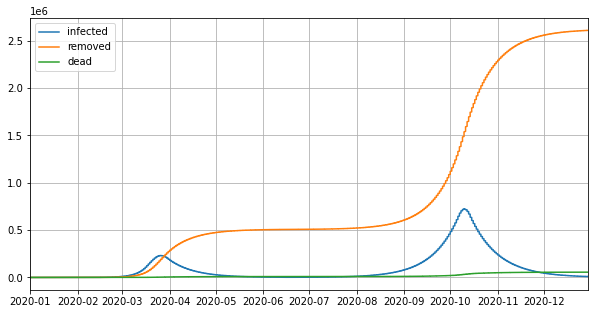

In [412]:
plt.figure(figsize=(10, 5))
plt.plot(TIME_LABEL, I, label="infected")
plt.plot(TIME_LABEL, R, label="removed")
plt.plot(TIME_LABEL, D, label="dead")

plt.grid(True)
plt.legend()
plt.xlim(TIME_LABEL[0], TIME_LABEL[-1])
plt.show()

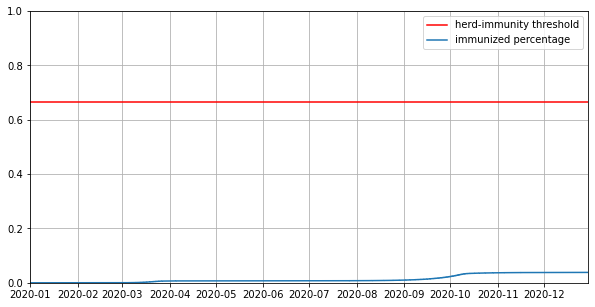

In [413]:
plt.figure(figsize=(10, 5))
plt.axhline(1-1/R0[0], color='r', label="herd-immunity threshold")
plt.plot(TIME_LABEL, (I+R+D)/N, label="immunized percentage")
plt.grid(True)
plt.legend()
plt.ylim(0., 1.)
plt.xlim(TIME_LABEL[0], TIME_LABEL[-1])
plt.show()

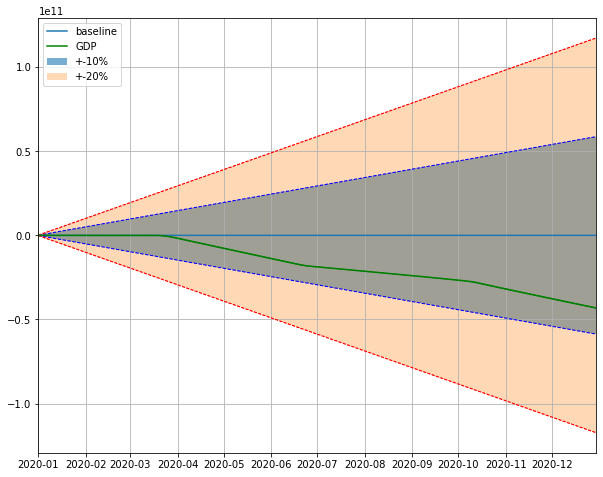

In [414]:
plt.figure(figsize=(10, 8))
ts = N*alpha(R0[0])*TIME_SPACE

plt.plot(TIME_LABEL, (1.10 - 1)*ts, "b--", linewidth=1)
plt.plot(TIME_LABEL, (0.90 - 1)*ts, "b--", linewidth=1)
plt.fill_between(TIME_LABEL, (0.90 - 1)*ts, (1.10 - 1)*ts, alpha=0.6, label="+-10%")

plt.plot(TIME_LABEL, (1.20 - 1)*ts, "r--", linewidth=1)
plt.plot(TIME_LABEL, (0.80 - 1)*ts, "r--", linewidth=1)
plt.fill_between(TIME_LABEL, (0.80 - 1)*ts, (1.20 - 1)*ts, alpha=0.3, label="+-20%")


plt.plot(TIME_LABEL, ts-ts, label="baseline")


plt.plot(TIME_LABEL, GDP-ts, "green", label="GDP")

plt.xlim(TIME_LABEL[0], TIME_LABEL[-1])
plt.legend()
plt.grid(True)

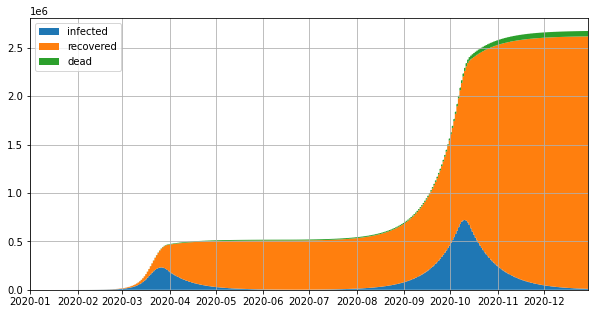

In [415]:
plt.figure(figsize=(10, 5))
plt.stackplot(TIME_LABEL, [I,R,D], labels=["infected", "recovered", "dead"])
plt.grid(True)
plt.legend(loc="upper left")
plt.xlim(TIME_LABEL[0], TIME_LABEL[-1])
plt.show()

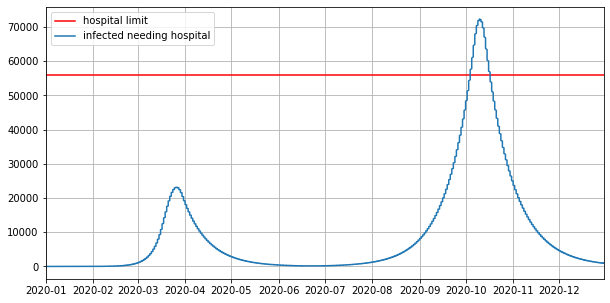

In [406]:
plt.figure(figsize=(10, 5))
plt.axhline(hospital_limit_percentage*N, color='r', label="hospital limit")
plt.plot(TIME_LABEL, I*hospital_ratio, label="infected needing hospital")
plt.xlim(TIME_LABEL[0], TIME_LABEL[-1])

plt.grid(True)
plt.legend()
plt.show()

In [427]:
print("-- SCORE --")
print(f"death toll: {D[-1]:.2f} or {1000*D[-1]/N:.4f}‰ of the population")
print(f"number of cases: {R[-1]:.2f}")
tmp = N*alpha(R0[0])*TIME_SPACE[-1]
print(f"GDP: {100*(GDP[-1]-tmp)/tmp:.2f}%")

-- SCORE --
death toll: 55770.05 or 0.7967‰ of the population
number of cases: 2610209.09
GDP: -7.36%
